In [35]:
import numpy as np
import pandas as pd 
import nltk 
import matplotlib.pyplot as plt 
import re 
import seaborn as sns 
import pickle 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
df= pd.read_csv("Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [5]:
df.shape

(12976, 28)

In [6]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [7]:
df.dropna(axis=1,inplace=True)  #we aer droping the columns with nan

In [8]:
df.shape

(12976, 6)

In [9]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [10]:
df['essay_set'].value_counts() #count of unique values in essay set

essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: count, dtype: int64

In [11]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [12]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [13]:
min(df['domain1_score'])

0

In [14]:
max(df['domain1_score'])

60

In [15]:
df[['essay_id','essay_set','domain1_score']].skew()

essay_id         0.044368
essay_set        0.067896
domain1_score    2.475881
dtype: float64

domain score is highly positive skew , A positive skew means that most of the scores in domain1_score are clustered towards the lower end of the range, with a longer tail extending to the right
This could imply that a few essays received high scores, but the majority have lower scores


In [16]:
df[['essay_id','essay_set','domain1_score']].kurtosis()

essay_id        -1.174375
essay_set       -1.151431
domain1_score    6.077899
dtype: float64

This is a positive kurtosis value, indicating a leptokurtic distribution.
A leptokurtic distribution has heavier tails and a sharper peak than a normal distribution.
This suggests that domain1_score has a high concentration of values around the mean with more outliers—meaning there are extreme scores both at the low and high ends.


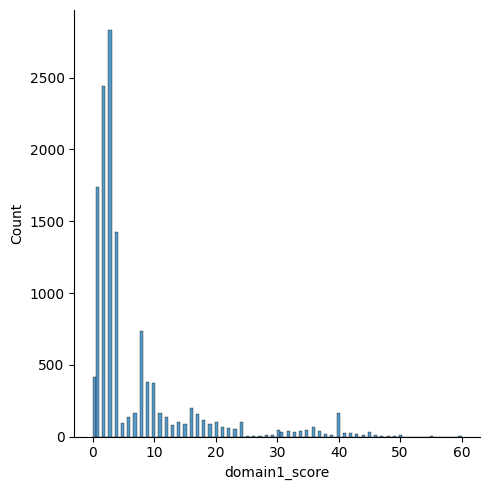

In [17]:
sns.displot(df['domain1_score'])

This confirms the positive skewness value we calculated earlier, where the majority of scores are concentrated on the left side of the plot (lower values).

In [18]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,min,max):
    print("Before Normalization: "+str(x))
    x=(x-min)/(max-min)
    print("After Normalization : "+str(x))
    return round(x*10)


df['final_score']=df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

Before Normalization: 8
After Normalization : 0.6
Before Normalization: 9
After Normalization : 0.7
Before Normalization: 7
After Normalization : 0.5
Before Normalization: 10
After Normalization : 0.8
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 10
After Normalization : 0.8
Before Normalization: 10
After Normalization : 0.8
Before Normalization: 9
After Normalization : 0.7
Before Normalization: 9
After Normalization : 0.7
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 7
After Normalization : 0.5
Before Normalization: 6
After Normalization : 0.4
Before Normalization: 6
After Normalization : 0.4
Before Normalization: 12
After Normalization : 1.0
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 4
After Normalization : 0.2
Before Normalization: 6
After Normalization : 

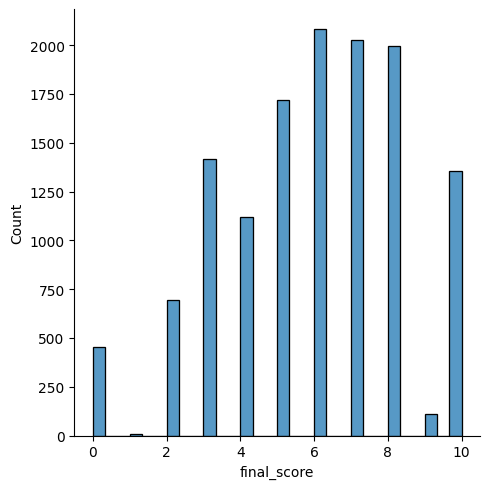

In [19]:
sns.displot(df['final_score'])

In [20]:
df['final_score'].skew()

np.float64(-0.24895575994559327)

In [21]:
df.head(3)

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5


In [22]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,6.800247,5.849877
std,6309.074105,2.136913,8.970705,2.466040
min,1.000000,1.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,4.000000
50%,10044.500000,4.000000,3.000000,6.000000
75%,15681.250000,6.000000,8.000000,8.000000
max,21633.000000,8.000000,60.000000,10.000000


In [23]:
df.drop('domain1_score',axis=1,inplace=True)

In [24]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8
4,5,1,"Dear @LOCATION1, I know having computers has a...",6


Data Pre-processing

In [25]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith('@'):
            continue
        else:
            x.append(i)

    return " ".join(x)

df['essay']=df['essay'].apply(lambda x:clean_essay(x))        

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [27]:
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'s', 'or', 'yours', "doesn't", 'did', 'will', "mustn't", 'very', "shouldn't", 'few', 'doesn', 'himself', 'm', 'this', 'being', 'yourselves', 'd', 'at', 'where', 'other', 'them', 'and', 'been', 'has', 'for', 'yourself', "won't", 'between', 't', 'were', 'because', 'if', 'off', 'should', 'in', 'of', 'down', 'who', 'while', 'only', 'be', 'here', "she's", 'themselves', 'these', "wouldn't", 'her', 'most', 'before', 'our', 'mightn', 'again', "don't", 'hadn', 'both', "you'll", 'll', 'against', 'with', 'me', 'does', 're', "haven't", 'just', 'whom', 'had', 'there', 'own', 'isn', 'ma', 'the', "aren't", 'through', 'o', 'under', 'same', 'wasn', "you'd", 'have', 'they', "that'll", 'how', 'it', "mightn't", 'why', "needn't", 'each', 'didn', 'are', 'which', 'their', "wasn't", 'its', "shan't", 'after', 'weren', 'doing', 'to', 'ours', 'ain', 'now', 'you', 'about', 'nor', 'on', 'from', 'him', 'was', 'no', 'over', "should've", "hadn't", 'wouldn', 'we', 'theirs', 'below', 'herself', 'i', 'your', 'hasn', 'm

In [28]:
stop_words = set(stopwords.words('english')) 
def datapreprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text_token = word_tokenize(text)
    filtered_text = [w for w in text_token if w not in stop_words]
    return ' '.join(filtered_text)  
df['essay_cleaned'] = df['essay'].apply(datapreprocess)

In [29]:
df.head()

,essay_id,essay_set,essay,final_score,essay_cleaned
0,1,1,"Dear local newspaper, I think effects computer...",6,dear local newspaper think effects computers p...
1,2,1,Dear I believe that using computers will benef...,7,dear believe using computers benefit us many w...
2,3,1,"Dear, More and more people use computers, but ...",5,dear people use computers everyone agrees bene...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,dear local newspaper found many experts say co...
4,5,1,Dear I know having computers has a positive ef...,6,dear know computers positive effect people com...


In [30]:
vectorizer=CountVectorizer(max_features =1000,ngram_range=(1,3),stop_words='english')
count_vectors=vectorizer.fit_transform(df['essay_cleaned'])
feature_names=vectorizer.get_feature_names_out()
print(feature_names)
data=df[['essay_set','essay_cleaned','final_score']]
X=count_vectors.toarray()
print(X)
y=data['final_score'].to_numpy()
print(y)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3)

['ability' 'able' 'access' 'accident' 'act' 'actually' 'add' 'add stress'
 'adult' 'adults' 'affect' 'affect cyclist' 'affected' 'affected cyclist'
 'affects' 'age' 'ago' 'agree' 'ahead' 'air' 'air currents' 'airships'
 'airships flying' 'airships flying low' 'al' 'al smith' 'allow'
 'allow dirigibles' 'allow dirigibles dock' 'allowed' 'allowing' 'allows'
 'alot' 'amazing' 'answer' 'anymore' 'appropriate' 'architects' 'area'
 'areas' 'arms' 'article' 'ask' 'asked' 'attempting' 'attempting allow'
 'attempting allow dirigibles' 'attention' 'author' 'author concludes'
 'author concludes story' 'author memoir' 'authors' 'away' 'bad' 'banned'
 'based' 'beautiful' 'bed' 'began' 'begin' 'beginning' 'believe'
 'believe computers' 'benefit' 'benefit society' 'benefits' 'best'
 'best friend' 'better' 'better life' 'big' 'bike' 'birthday' 'bit'
 'blimp' 'blimps' 'blood' 'body' 'book' 'book shelf' 'books'
 'books magazines' 'books movies' 'books music' 'books music movies' 'boy'
 'bring' 'brings' 

Linear Regression

In [31]:
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,Y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_without_pp","wb"))

#use Saved Model
model=pickle.load(open("Saved_Models/LR_without_pp",'rb'))
y_pred=model.predict(X_test)
print("Mean Squared error :% 2f" % mean_squared_error(Y_test,y_pred))

Mean Squared error : 67790455920276963328.000000


Since linear regression is giving really bad results, we move on to models which do not map the features linearly like Support Vector Machines or Random Forests

Support Vector Regressor

In [32]:
clf=SVR(C=1.0,epsilon=0.2)
clf.fit(X_train,Y_train)
pickle.dump(clf,open("Saved_Models/SVR_without_pp","wb"))

#use the saved model
model=pickle.load(open("saved_models/SVR_without_pp","rb"))
y_pred=model.predict(X_test)

print("Mean square error %2f" % mean_squared_error(y_pred,Y_test))



Mean square error 2.140265


Random Forest

In [34]:
rf=RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42)
rf.fit(X_train,Y_train)
pickle.dump(rf,open("Saved_Models/RF_without_pp","wb"))

#use the saved model
model=pickle.load(open("Saved_Models/RF_without_pp",'rb'))
y_pred=model.predict(X_test)
print("Mean Square Error % 2f" % mean_squared_error(y_pred,Y_test))

Mean Square Error  3.419940
